Source type: coherent
g(2)(0) value: 1.448


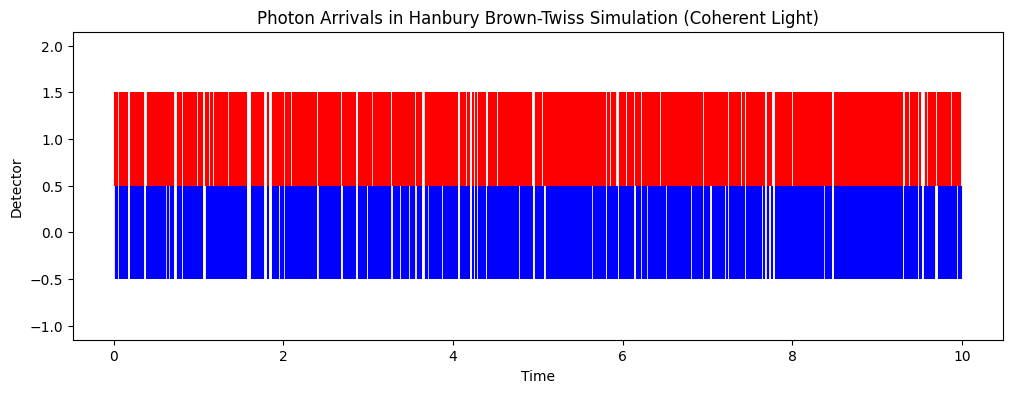

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters
num_photons = 1000        # Number of photons
time_window = 0.01        # Coincidence time window for detection
simulation_time = 10      # Total simulation time in arbitrary units
source_type = 'coherent'   # Choose 'thermal' or 'coherent'

# Useful quantities can be derived from other s

# Generate photon arrival times based on the source type
def generate_photon_arrivals(num_photons, simulation_time, source_type):
    if source_type == 'thermal':
        # Thermal light has bunched arrivals, which we simulate using an exponential distribution
        return np.cumsum(np.random.exponential(scale=0.1, size=num_photons)) % simulation_time
    elif source_type == 'coherent':
        # Coherent light has random Poisson distributed arrivals
        return np.sort(np.random.uniform(0, simulation_time, num_photons))

# Detector response to photon arrivals
def detect_photons(arrival_times, num_detectors=2):
    detector_times = []
    for _ in range(num_detectors):
        detector_times.append(arrival_times + np.random.normal(0, time_window / 2, len(arrival_times)))
    return detector_times

# Count coincidences within a time window
def count_coincidences(detector_a, detector_b, time_window):
    coincidences = 0
    for time_a in detector_a:
        close_times = np.abs(detector_b - time_a) <= time_window
        coincidences += np.sum(close_times)
    return coincidences

# Run the simulation
arrival_times = generate_photon_arrivals(num_photons, simulation_time, source_type)
detector_a, detector_b = detect_photons(arrival_times)

# Calculate the number of coincidences
coincidences = count_coincidences(detector_a, detector_b, time_window)

# Calculate g(2)(0) by normalizing coincidences
expected_coincidences = len(detector_a) * len(detector_b) * (2 * time_window) / simulation_time
g2_zero = coincidences / expected_coincidences

# Output results
print(f"Source type: {source_type}")
print(f"g(2)(0) value: {g2_zero}")

# Plot the photon arrivals for visualization
plt.figure(figsize=(12, 4))
plt.eventplot([detector_a, detector_b], colors=['blue', 'red'])
plt.title(f"Photon Arrivals in Hanbury Brown-Twiss Simulation ({source_type.capitalize()} Light)")
plt.xlabel("Time")
plt.ylabel("Detector")
plt.show()

[1.413, 1.4, 1.416, 1.4345, 1.384, 1.4785, 1.415, 1.4145, 1.447, 1.432, 1.415, 1.401, 1.397, 1.4115, 1.4165, 1.4245, 1.3885, 1.4585, 1.394, 1.4175, 1.4525, 1.414, 1.4525, 1.4055, 1.4325, 1.4035, 1.442, 1.456, 1.444, 1.39, 1.414, 1.3915, 1.4355, 1.435, 1.462, 1.4625, 1.419, 1.386, 1.397, 1.4305, 1.424, 1.4635, 1.372, 1.423, 1.454, 1.3755, 1.434, 1.417, 1.4355, 1.417, 1.388, 1.3845, 1.419, 1.435, 1.419, 1.4355, 1.3955, 1.43, 1.4115, 1.3915, 1.4015, 1.4405, 1.423, 1.4175, 1.384, 1.4345, 1.406, 1.3805, 1.3975, 1.4105]


Text(0, 0.5, '$g^2(0)$')

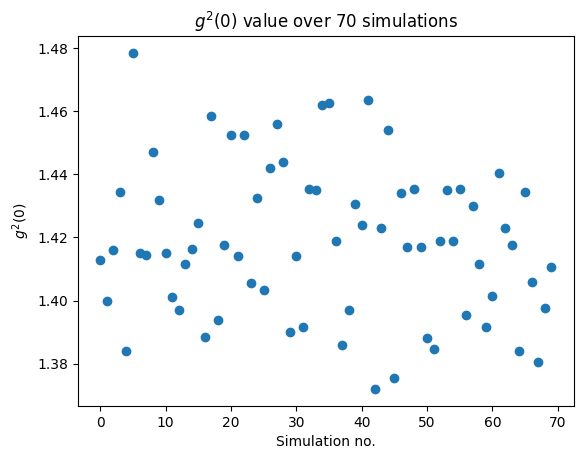

In [17]:
# Running the simulation multiple times. 
# Observe distribution of expected g2(0) values. Compare this to expected g2_zero values from theory. 

# Expected values for g2(0): 0 (classical), 1 (quantum)

N = 70 # number of simulations to run

index = []
g2_zero_values = []

for i in range(N):
    # Run the simulation
    arrival_times = generate_photon_arrivals(num_photons, simulation_time, source_type)
    detector_a, detector_b = detect_photons(arrival_times)

    # Calculate the number of coincidences
    coincidences = count_coincidences(detector_a, detector_b, time_window)

    # Calculate g(2)(0) by normalizing coincidences
    expected_coincidences = len(detector_a) * len(detector_b) * (2 * time_window) / simulation_time
    g2_zero = coincidences / expected_coincidences
    
    index.append(i)
    g2_zero_values.append(g2_zero)

print(g2_zero_values)
# Plotting data
plt.figure()
plt.title(f'$g^2(0)$ value over {N} simulations')
plt.scatter(index, g2_zero_values)
plt.xlabel('Simulation no.')
plt.ylabel(r'$g^2(0)$')


# WHY ARE THE VALUES AROUND 1.4?????